In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model
import sqlite3

: 

## Screen Data 

In [157]:
file_path='/Users/leonardochavezrojas/Desktop/Master/I/Challenges/Challenge 1/Data /Week 2/Screenw2.csv'
df=pd.read_csv(file_path,sep=';').iloc[:, np.r_[12:19, 21:28]] # Select only the desire columns
df.head(100)

,"October 15, 2024","October 16, 2024","October 17, 2024","October 18, 2024","October 19, 2024","October 20, 2024","October 21, 2024","October 24, 2024","October 25, 2024","October 26, 2024","October 27, 2024","October 28, 2024","October 29, 2024","October 30, 2024"
0,0s,5s,29s,0s,0s,10s,1m 45s,53s,0s,40s,0s,0s,42s,0s
1,0s,0s,0s,3m 15s,7m 13s,30s,1m 48s,0s,0s,0s,0s,0s,0s,0s
2,0s,0s,0s,0s,0s,0s,0s,0s,4s,0s,3s,1m 39s,0s,0s
3,0s,0s,0s,0s,0s,0s,0s,0s,0s,0s,0s,0s,1s,0s
4,8s,0s,0s,0s,0s,0s,0s,0s,0s,0s,0s,0s,0s,0s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0s,0s,0s,42s,0s,0s,0s,24s,0s,2m 30s,0s,0s,0s,53s
82,9h 46m 28s,5h 48m 42s,6h 44m 55s,10h 22m 47s,6h 50m 32s,5h 39m 17s,7h 5m 31s,6h 46m 55s,3h 45m 36s,6h 4m 12s,4h 21m 19s,4h 2m 47s,7h 37m 55s,6h 15m 3s
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
df1 = pd.DataFrame(df.iloc[82].to_frame().T) # select only the row of Total usage 
ds = pd.melt(df1, var_name='Date', value_name='Total Usage')# To split the values into two colums Date and Total Usage
ds

,Date,Total Usage
0,"October 15, 2024",9h 46m 28s
1,"October 16, 2024",5h 48m 42s
2,"October 17, 2024",6h 44m 55s
3,"October 18, 2024",10h 22m 47s
4,"October 19, 2024",6h 50m 32s
5,"October 20, 2024",5h 39m 17s
6,"October 21, 2024",7h 5m 31s
7,"October 24, 2024",6h 46m 55s
8,"October 25, 2024",3h 45m 36s
9,"October 26, 2024",6h 4m 12s


In [161]:
ds[['hours', 'minutes', 'seconds']] = ds['Total Usage'].str.extract(r'(?:(\d+)h)?\s*(?:(\d+)m)?\s*(?:(\d+)s)?')
ds[['hours', 'minutes', 'seconds']] = ds[['hours', 'minutes', 'seconds']].fillna(0).astype(int)
ds['Total Hours'] = ds['hours'] + ds['minutes'] / 60 + ds['seconds'] / 3600  # Add a column of total hours 
ds = ds.drop(columns=['hours', 'minutes', 'seconds'])
print(ds)

                Date  Total Usage  Total Hours
0   October 15, 2024   9h 46m 28s     9.774444
1   October 16, 2024   5h 48m 42s     5.811667
2   October 17, 2024   6h 44m 55s     6.748611
3   October 18, 2024  10h 22m 47s    10.379722
4   October 19, 2024   6h 50m 32s     6.842222
5   October 20, 2024   5h 39m 17s     5.654722
6   October 21, 2024    7h 5m 31s     7.091944
7   October 24, 2024   6h 46m 55s     6.781944
8   October 25, 2024   3h 45m 36s     3.760000
9   October 26, 2024    6h 4m 12s     6.070000
10  October 27, 2024   4h 21m 19s     4.355278
11  October 28, 2024    4h 2m 47s     4.046389
12  October 29, 2024   7h 37m 55s     7.631944
13  October 30, 2024    6h 15m 3s     6.250833


In [163]:
Tuse=ds['Total Hours'] 

## Sleep Data 

In [166]:
file_path2='/Users/leonardochavezrojas/Desktop/Master/I/Challenges/Challenge 1/Data /Week 1/Sleepw1.csv'
df2=pd.read_csv(file_path2,sep=';').iloc[:, [1,2,3]]
df2

,Sleep Quality,Time in bed,Time asleep
0,41%,"3,98","2,76"
1,59%,"5,72","4,5"
2,77%,"6,03","5,14"
3,70%,"7,45","5,5"
4,35%,"6,28","4,57"
5,44%,"5,45","5,12"
6,72%,"6,36","4,73"
7,48%,"4,6","3,39"
8,58%,"5,23","4,46"
9,56%,"5,78","4,58"


In [168]:
Tbed=df2['Time in bed '].str.replace(',', '.', regex=False).astype(float) #replace , for .
Tas=df2['Time asleep '].str.replace(',', '.', regex=False).astype(float)
Quality=df2['Sleep Quality'].str.replace('%', '').astype(float) # remove the % sign

In [170]:
Days = list(range(0, len(ds)))

## Initial Analysis (Single Variable exploration) 

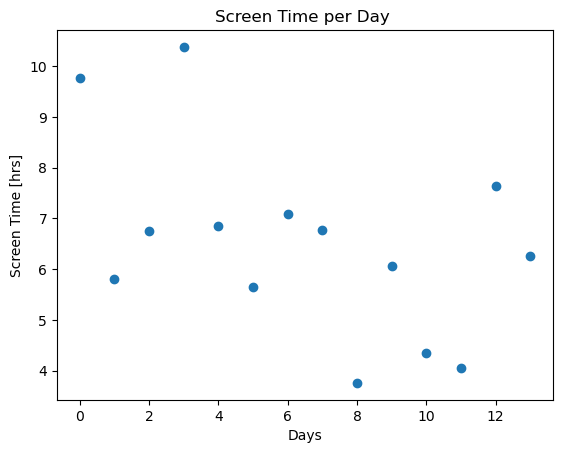

In [173]:
plt.scatter(Days,Tuse)
plt.title('Screen Time per Day ')
plt.xlabel("Days")
plt.ylabel("Screen Time [hrs]")
plt.show()

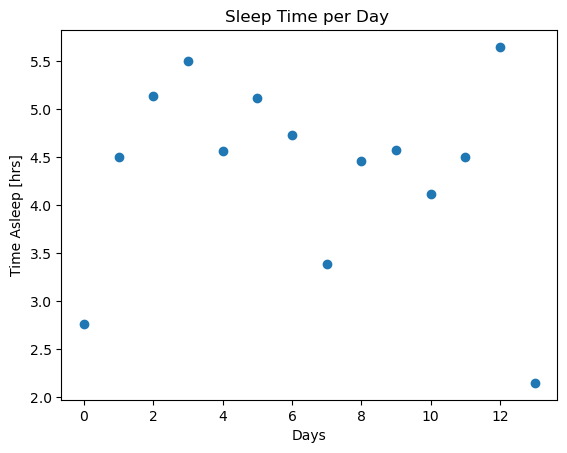

In [175]:
plt.scatter(Days,Tas)
plt.title('Sleep Time per Day ')
plt.xlabel("Days")
plt.ylabel("Time Asleep [hrs]")
plt.show()

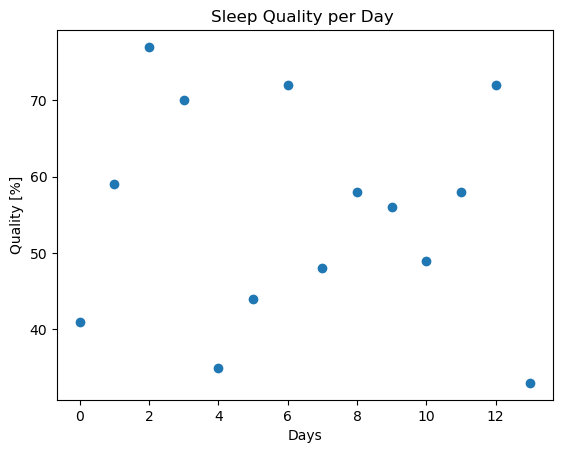

In [177]:
plt.scatter(Days,Quality)
plt.title('Sleep Quality per Day ')
plt.xlabel("Days")
plt.ylabel("Quality [%]")
plt.show()

## Analysis (Multiple Variable exploration) 

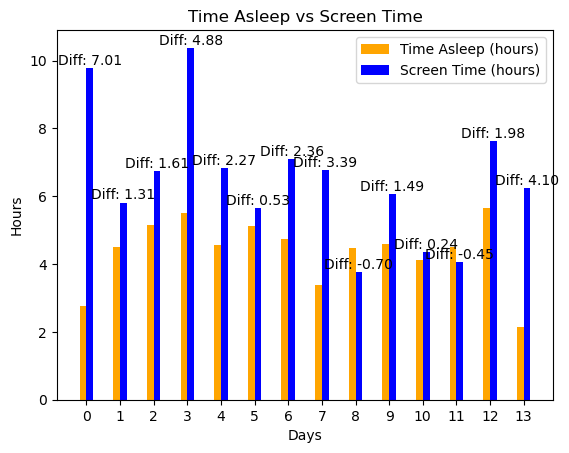

In [180]:
differences = [use - asleep for use, asleep in zip(Tuse, Tas)]
bar_width = 0.20  
index = np.arange(len(Days))
plt.bar(index,Tas, width=bar_width, label='Time Asleep (hours)', color='orange')  # First bar plot
plt.bar(index + bar_width, Tuse, width=bar_width, label='Screen Time (hours)', color='blue')  # Second bar plot
for i, diff in enumerate(differences):
    plt.text(i + bar_width, Tuse[i] + 0.1, f'Diff: {diff:.2f}', ha='center', color='black')
plt.xlabel('Days')
plt.ylabel('Hours')
plt.title('Time Asleep vs Screen Time')
plt.xticks(index + bar_width / 2, Days)
plt.legend()


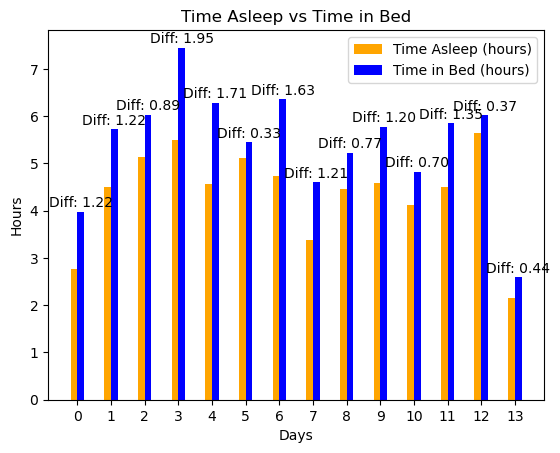

In [182]:
differences = [bed - asleep for bed, asleep in zip(Tbed, Tas)]
bar_width = 0.20  
index = np.arange(len(Days))
plt.bar(index, Tas, width=bar_width, label='Time Asleep (hours)', color='orange')  # First bar plot
plt.bar(index + bar_width, Tbed, width=bar_width, label='Time in Bed (hours)', color='blue')  # Second bar plot
for i, diff in enumerate(differences):
    plt.text(i + bar_width, Tbed[i] + 0.1, f'Diff: {diff:.2f}', ha='center', color='black')
plt.xlabel('Days')
plt.ylabel('Hours')
plt.title('Time Asleep vs Time in Bed')
plt.xticks(index + bar_width / 2, Days)
plt.legend()
plt.show()

In [184]:
Quality_df = Quality.to_frame()
min_val = Quality_df.min().values[0]
max_val = Quality_df.max().values[0]
mid_val = (min_val + max_val) / 2

print ('The minimum value is : ', min_val)
print ('The maximum value is : ',max_val)
print ('The mid value is : ',mid_val)

The minimum value is :  33.0
The maximum value is :  77.0
The mid value is :  55.0


In [186]:
def highlight_cells(value):
    if value >= mid_val:
        return 'background-color: green; color: black'
    elif min_val < value < mid_val:
        return 'background-color: yellow; color: black'
    else:
        return 'background-color: red; color: black'
    
styled_quality = Quality_df.style.applymap(highlight_cells)
styled_quality = styled_quality.format(na_rep='-', formatter={col: '{:.0f}%' for col in Quality_df.select_dtypes(include='number').columns})
styled_quality

/var/folders/tg/l_hs5wds7gzdb2g4lgw6f1vc0000gn/T/ipykernel_65505/3602245160.py:9: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_quality = Quality_df.style.applymap(highlight_cells)


,Sleep Quality
0,41%
1,59%
2,77%
3,70%
4,35%
5,44%
6,72%
7,48%
8,58%
9,56%


## Linear Regression 

The value r > 0 indicates positive correlation between x and y.

The value r = 0 corresponds to the case in which there’s no linear relationship between x and y.

The value r < 0 indicates negative correlation between x and y

In [189]:
import numpy as np
import scipy.stats
X = Tuse.values
Y = Tas.values
r = np.corrcoef(X, Y)
r

array([[1.        , 0.01898161],
       [0.01898161, 1.        ]])

In [191]:
slope, intercept, r, p, stderr = scipy.stats.linregress(X, Y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

'Regression line: y=4.30+0.01x, r=0.02'

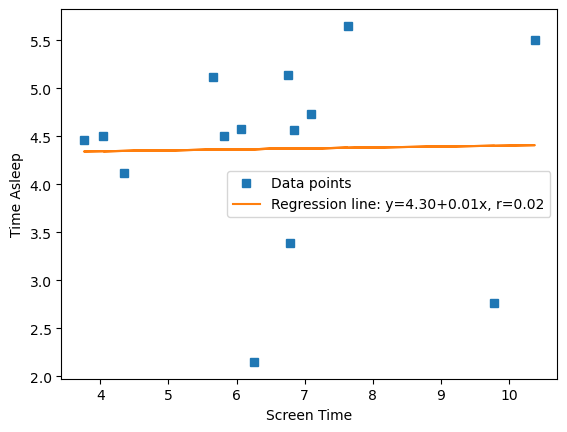

In [193]:
fig, ax = plt.subplots()
ax.plot(X, Y, linewidth=0, marker='s', label='Data points')
ax.plot(X, intercept + slope * X, label=line)
ax.set_xlabel('Screen Time')
ax.set_ylabel('Time Asleep')
ax.legend(facecolor='white')
plt.show()

## Polynomial Function 

In [196]:
X = Tuse.values
Y = Tas.values

   Degree                                           Equation  R-squared
0       4    76.71 + -46.97X + 10.97X^2 + -1.10X^3 + 0.04X^4   0.134518
1       5  -254.81 + 216.27X + -69.93X^2 + 10.95X^3 + -0....   0.330955
2       6  1411.81 + -1427.49X + 587.39X^2 + -125.44X^3 +...   0.536753


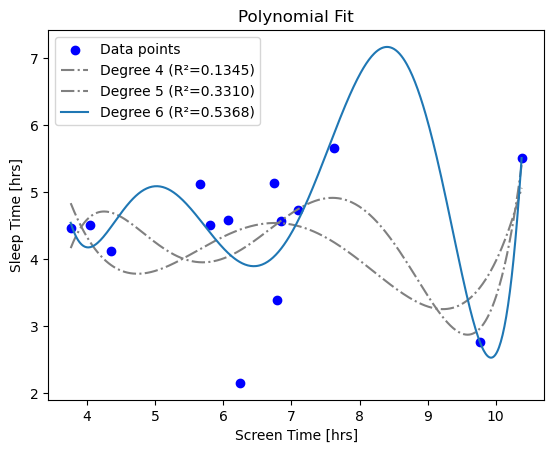

In [198]:
def calculate_r_squared(Y, Y_pred):
    ss_res = np.sum((Y - Y_pred) ** 2)  # Residual sum of squares
    ss_tot = np.sum((Y - np.mean(Y)) ** 2)  # Total sum of squares
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

degrees = [4,5,6]  
polynomials = {}
r_squared_values = []

for degree in degrees:
    coefficients = np.polyfit(X, Y, degree)
    polynomials[degree] = coefficients
    
    # Create a polynomial function from the coefficients
    poly_func = np.poly1d(coefficients)
    
    # Calculate predicted Y values
    Y_pred = poly_func(X)
    
    # Calculate R-squared
    r_squared = calculate_r_squared(Y, Y_pred)
    r_squared_values.append({'Degree': degree, 'Equation': " + ".join([f"{coeff:.2f}X^{deg}" if deg > 1 else (f"{coeff:.2f}X" if deg == 1 else f"{coeff:.2f}")
                                                                       for deg, coeff in enumerate(coefficients[::-1])]), 
                             'R-squared': r_squared})


r_squared_df = pd.DataFrame(r_squared_values)
print(r_squared_df)

plt.scatter(X, Y, color='blue', label='Data points')
x_range = np.linspace(min(X), max(X), 500)
# Plot polynomials with the highest degree in color and others in grey with different line styles
for degree, coefficients in polynomials.items():
    poly_func = np.poly1d(coefficients)
    if degree == max(degrees):
        plt.plot(x_range, poly_func(x_range), label=f'Degree {degree} (R²={r_squared_df[r_squared_df["Degree"] == degree]["R-squared"].values[0]:.4f})')
    else:
        plt.plot(x_range, poly_func(x_range), color='grey', linestyle='--' if degree == 3 else '-.', label=f'Degree {degree} (R²={r_squared_df[r_squared_df["Degree"] == degree]["R-squared"].values[0]:.4f})')

plt.xlabel('Screen Time [hrs]')
plt.ylabel('Sleep Time [hrs]')
plt.title('Polynomial Fit')
plt.legend()
plt.show()

## Errors

In [201]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import numpy as np

In [203]:
Tas = np.array([Tas])  
Tuse = np.array([Tuse])
print("Shape of Tas:", Tas.shape)
print("Shape of Tuse:", Tuse.shape)


Shape of Tas: (1, 14)
Shape of Tuse: (1, 14)


In [205]:
Tas_flat = Tas.flatten()
Tuse_flat = Tuse.flatten()

if Tas_flat.shape == Tuse_flat.shape:
    
    mse = mean_squared_error(Tas_flat, Tuse_flat)
    mae = mean_absolute_error(Tas_flat, Tuse_flat)

    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
else:
    print("Error: Tas and Tuse have different lengths after flattening. Check your data dimensions.")


Mean Squared Error (MSE): 8.8265
Mean Absolute Error (MAE): 2.3098
